# Linear Regression

In [439]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [440]:
# Set variables
theta = [2, 1]
data_num = 1000
train_step_num = 20
learning_rate = 0.3
rand_seed = 0
rand_param = [0, 0.5, 0.3]

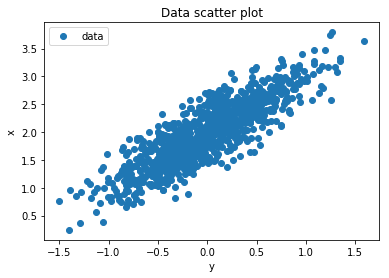

In [441]:
# Create x, y data
np.random.seed(rand_seed)
data_list = []
for i in range(data_num):
    x = np.random.normal(rand_param[0], rand_param[1])
    y = theta[0] + theta[1] * x + np.random.normal(rand_param[0], rand_param[2])
    data_list.append([x, y])
    
x_data = np.asarray([data[0] for data in data_list])
y_data = np.asarray([data[1] for data in data_list])

# Plot x, y
plt.plot(x_data, y_data, "o")
plt.title("Data scatter plot")
plt.legend(["data"])
plt.ylabel("x")
plt.xlabel("y")

In [442]:
# Create symbolic variables
theta_tf = []
theta_tf.insert(0, tf.Variable(tf.zeros([1])))
theta_tf.insert(1, tf.Variable(tf.random_uniform([1], -1.0, 1.0, seed=rand_seed)))
y_pred = theta_tf[0] + theta_tf[1] * x_data

# Define loss
# We use only train data for example, you should use test data in real case
loss = tf.reduce_mean(tf.square(y_pred - y_data))

# Create opimizer, we use gradient descent
gd_opimizer = tf.train.GradientDescentOptimizer(learning_rate)

# Set train
train = gd_opimizer.minimize(loss)

# Init and create session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [443]:
# Train
theta_tf_list = []
loss_list = []
for step in range(train_step_num):
    sess.run(train)
    theta_tf_list.append([sess.run(theta_tf[0]), sess.run(theta_tf[1])])
    loss_list.append(sess.run(loss))

In [444]:
# Create simple draw function
def simpleTrainGraph(iter_num, ax):
    iter_theta_tf = theta_tf_list[iter_num-1]
    ax.plot(x_data, y_data, "o")
    ax.plot(x_data, iter_theta_tf[0][0] + iter_theta_tf[1][0] * x_data)
    ax.set_title("Iter {}".format(iter_num))
    ax.legend(["data", "line by train"])
    ax.set_xlabel("x")
    ax.set_xlabel("y")

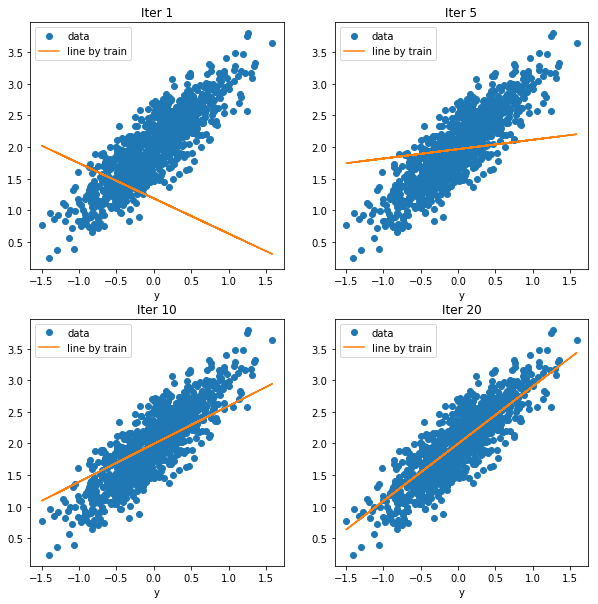

In [445]:
# Draw train model result
fig, ax = plt.subplots(2, 2, figsize=(10,10))
simpleTrainGraph(1, ax[0,0])
simpleTrainGraph(5, ax[0,1])
simpleTrainGraph(10, ax[1,0])
simpleTrainGraph(20, ax[1,1])

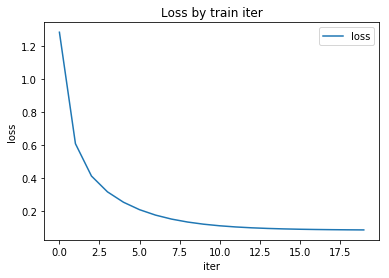

In [446]:
# Draw loss result
plt.plot(range(len(loss_list)), loss_list)
plt.title("Loss by train iter")
plt.legend(["loss"])
plt.ylabel("loss")
plt.xlabel("iter")